# Uber Rider Data Case Study

## Load data and browse data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('data/churn.csv')

In [3]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_no_phone,churn
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.779050,4.650038,1.074764,8.849536,2.278200,0.37708,60.926084,0.330680,0.202600,0.466720,0.300440,0.691640,0.007920,0.623920
std,5.707357,0.445974,0.575601,0.222336,19.958811,3.792684,0.48466,37.081503,0.470463,0.401941,0.498896,0.458454,0.461821,0.088642,0.484405
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,0.00000,33.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,0.00000,66.700000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,1.00000,100.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,1.00000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Define Features and Target

In [4]:
selected_features = [u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', u'avg_surge', 
                     u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user', 
                     u'weekday_pct', u'city_Astapor', u'city_King\'s Landing',u'city_Winterfell', 
                     u'phone_Android', u'phone_iPhone', u'phone_no_phone']
target = u'churn'
X = df[selected_features].values
y = df['churn'].values

In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=113)

/Users/zhangtianqi/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Train and tune logistic regression

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = [
  {'C': [0.1,1, 10, 100], 'penalty': ['l1','l2']}
 ]
lr_gridsearch = GridSearchCV(estimator=LogisticRegression(random_state=1),param_grid=param_grid,scoring='roc_auc',
                             cv = 5)
lr_gridsearch.fit(X_train, y_train)
print lr_gridsearch.best_params_
print lr_gridsearch.best_score_

{'penalty': 'l2', 'C': 0.1}
0.762753960208


In [8]:
param_grid = [
  {'C': [0.1,0.01,0.001], 'penalty': ['l1','l2']}
 ]
lr_gridsearch = GridSearchCV(estimator=LogisticRegression(),param_grid=param_grid,scoring='roc_auc',
                             cv = 5)
lr_gridsearch.fit(X_train, y_train)
print lr_gridsearch.best_params_
print lr_gridsearch.best_score_

{'penalty': 'l2', 'C': 0.01}
0.762912061198


In [9]:
lr = LogisticRegression(C=0.01,penalty='l2')
lr.fit(X_train, y_train)
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

## Train and tune random forest



In [10]:
from sklearn.ensemble import RandomForestClassifier

param_rf = {
 'criterion':['gini','entropy'],
 'max_features':['auto','log2',0.2,None],
 'min_samples_leaf':[40,50,60,70,80]
}
gsearch_rf = GridSearchCV(estimator = RandomForestClassifier(n_jobs=-1, random_state = 111), 
 param_grid = param_rf, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch_rf.fit(X_train, y_train)
gsearch_rf.best_params_, gsearch_rf.best_score_

({'criterion': 'entropy', 'max_features': None, 'min_samples_leaf': 50},
 0.84588968931910691)

In [11]:
rf = RandomForestClassifier(min_samples_leaf=50,criterion='entropy',max_features=None,n_jobs=-1,random_state = 111)
rf.fit(X_train, y_train)
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [12]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
def print_results(y_true, y_pred):
    print("Accuracy is: {}".format(accuracy_score(y_true, y_pred)))
    print("Precision is: {}".format(precision_score(y_true, y_pred)))
    print("Recall is: {}".format(recall_score(y_true, y_pred)))
    print("f1-score is: {}".format(f1_score(y_true, y_pred)))
    print("AUC score is: {}".format(roc_auc_score(y_true, y_pred)))

In [13]:
print("Training set scores of logistic regression:")
print_results(y_train, y_train_pred_lr)

Training set scores of logistic regression:
Accuracy is: 0.719725
Precision is: 0.735922130445
Recall is: 0.859636480102
f1-score is: 0.792983104053
AUC score is: 0.673361043939


In [14]:
print("Test set scores of logistic regression:")
print_results(y_test, y_test_pred_lr)

Test set scores of logistic regression:
Accuracy is: 0.7163
Precision is: 0.729656296699
Recall is: 0.863782566742
f1-score is: 0.7910744532
AUC score is: 0.668802970309


In [15]:
print("Training set scores of random forest:")
print_results(y_train, y_train_pred_rf)

Training set scores of random forest:
Accuracy is: 0.79255
Precision is: 0.813651748778
Recall is: 0.866162222756
f1-score is: 0.839086255042
AUC score is: 0.768156334384


In [16]:
print("Test set scores of random forest:")
print_results(y_test, y_test_pred_rf)

Test set scores of random forest:
Accuracy is: 0.7811
Precision is: 0.799375835934
Recall is: 0.865069154069
f1-score is: 0.830926083263
AUC score is: 0.754057580736


In [20]:
df_coeffs = pd.DataFrame(list(zip(selected_features, lr.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
8,city_Astapor,0.676494
11,phone_Android,0.502685
10,city_Winterfell,0.191454
1,avg_rating_by_driver,0.121435
2,avg_rating_of_driver,0.112697
3,avg_surge,0.098852
0,avg_dist,0.032969
7,weekday_pct,0.000065
4,surge_pct,-0.003051
13,phone_no_phone,-0.012292


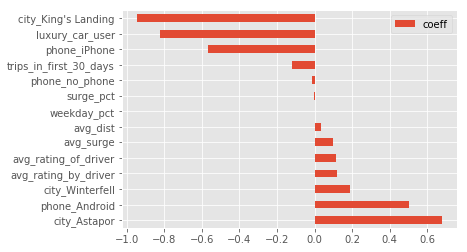

In [21]:
ax = df_coeffs.plot.barh()
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.show()

In [17]:
df_imp = pd.DataFrame(list(zip(selected_features, rf.feature_importances_.flatten()))).sort_values(by=[1], ascending=False)
df_imp.columns = ['feature', 'importance']
df_imp

,feature,importance
1,avg_rating_by_driver,0.317854
9,city_King's Landing,0.166446
7,weekday_pct,0.102947
4,surge_pct,0.073491
0,avg_dist,0.066918
11,phone_Android,0.060995
6,luxury_car_user,0.059794
5,trips_in_first_30_days,0.058103
12,phone_iPhone,0.030611
2,avg_rating_of_driver,0.022305


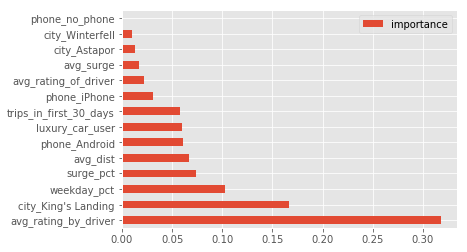

In [22]:
ax = df_imp.plot.barh()
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_imp['feature'])
plt.show()

### Model Evaluation

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

In [24]:
# Helper method to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    '''
    Code from sklearn example.
    '''
    
    cm = confusion_matrix(y_true, y_pred)

    print(cm)

    # Show confusion matrix in a separate window
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

[[1792 1990]
 [ 847 5371]]


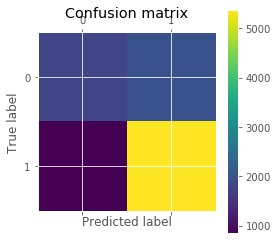

In [25]:
plot_confusion_matrix(y_test, y_test_pred_lr)

[[2432 1350]
 [ 839 5379]]


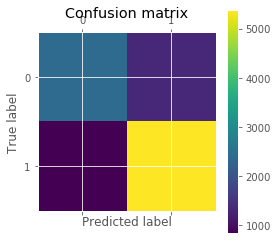

In [26]:
plot_confusion_matrix(y_test, y_test_pred_rf)

#### Classification report

In [27]:
print(classification_report(y_test, y_test_pred_lr))

             precision    recall  f1-score   support

          0       0.68      0.47      0.56      3782
          1       0.73      0.86      0.79      6218

avg / total       0.71      0.72      0.70     10000



In [28]:
print(classification_report(y_test, y_test_pred_rf))

             precision    recall  f1-score   support

          0       0.74      0.64      0.69      3782
          1       0.80      0.87      0.83      6218

avg / total       0.78      0.78      0.78     10000



#### Plot ROC curve

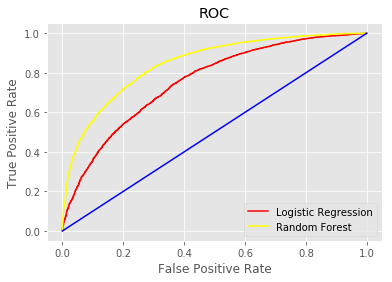

In [31]:
y_test_pred_proba_lr = lr.predict_proba(X_test)[:,1]
y_test_pred_proba_rf = rf.predict_proba(X_test)[:,1]

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_test_pred_proba_lr)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_test_pred_proba_rf)

plt.plot(fpr_lr, tpr_lr, color='red')
plt.plot(fpr_rf, tpr_rf, color='yellow')
plt.legend(['Logistic Regression', 'Random Forest'],loc='lower right')

xx = np.linspace(0, 1.0, 20)
plt.plot(xx, xx, color='blue')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")

plt.show()


## Cost-benefit Analysis - Profit Curve

#### Uber uses sign up coupon to attract new riders

![Signup Coupon](./images/uber_20_off_first_ride_coupon.png)

#### Uber also gives coupon to retain likely churning riders

![retention Coupon](./images/uber_10_off_coupon.png)

#### Confusion matrix

|               |   Actual Yes   |   Actual No    |
| ------------- |:--------------:|:--------------:|
| Predicted Yes | True positive  | False positive |
| Predicted No  | False negative | True negative  |

#### Define cost-benefit matrix

|               |   Actual Yes   |   Actual No    |
| ------------- |:--------------:|:--------------:|
| Predicted Yes |    gain 10     |    lose 10     |
| Predicted No  |     lose 5     |       0        |


In [42]:
costbenefit = np.array([[10,-10],
                        [-5,0]]) 

In [34]:
def standard_confusion_matrix(y_true, y_predict):
    """Given y and predicted y, generate standard orientation
    
    Args:
    =====
    numpy array: y_true - array of true label
    numpy array: y_predict - array of predicted label
    
    Return:
    ======:
    numpy array: confusion matrix, 2x2 numpy array
    """
    [[tn,fp],[fn,tp]] = confusion_matrix(y_true, y_predict)
    return np.array([[tp, fp], [fn, tn]])

def profit_curve(cost_benefit_matrix, probabilities, y_true):
    """Given cost-benefit matrix, predicted probability, 
    and true label, calculate expected profit associated with 
    each threshold.
    
    Args:
    =====
    numpy array: cost_benefit_matrix, 2x2 array
    numpy array: probabilities - array of predicted probabilities
    numpy array: y_true - array of true label
    
    Return:
    ======:
    numpy array: threshold
    numpy array: profit
    """
    
    thresholds= sorted(probabilities, reverse = True)
    profits= []
    for threshold in thresholds:
        y_predict = probabilities > threshold
        confusion_mat = standard_confusion_matrix(y_true, y_predict)
        profits.append(np.sum(confusion_mat * cost_benefit_matrix)/float(len(y_true)))
    return thresholds, profits

def plot_profit_model(profits, label="Logistic Regression"):
    """Plot profits against pertentage of test instance
    """
    percentages = np.linspace(0, 100, len(profits))
    plt.plot(percentages, profits, label=label)
    plt.title("Profit Curve")
    plt.xlabel("Percentage of test instances (decreasing by score)")
    plt.ylabel("Profit")
    plt.legend(loc='best')
    plt.savefig('profit_curve.png')
    plt.show()
    
def find_best_threshold(thresholds, profits):
    """Find the best threshold that gives max profit
    
    Args:
    =====
    numpy array: thresholds - array of sorted threshold
    numpy array: profits - array of profits
    
    Return:
    ======:
    float: threshold that corresponds to max profit
    float: max profit
    """
    max_profits_ind = np.argmax(profits)
    max_thresholds = thresholds[max_profits_ind]
    max_profits = np.max(profits)
    return max_profits, max_thresholds

#### Plot profit curve 

In [43]:
# Make prediction on the probabilities
probabilities_lr = lr.predict_proba(X_test)[:, 1]

# Calculate expected profits corresponding to different threshold
thresholds_lr, profits_lr = profit_curve(costbenefit, probabilities_lr, y_test)


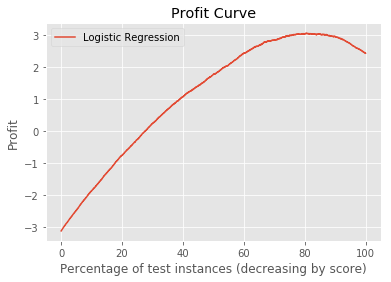

In [44]:
plot_profit_model(profits_lr, label="Logistic Regression")

In [45]:
 max_profit_lr, max_threshold_lr = find_best_threshold(thresholds_lr, profits_lr)

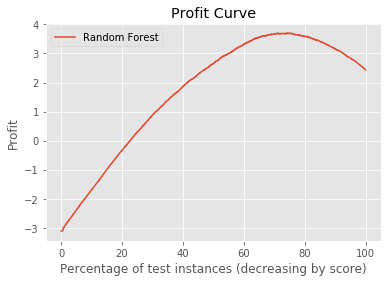

In [46]:
# Make prediction on the probabilities
probabilities_rf = rf.predict_proba(X_test)[:, 1]

# Calculate expected profits corresponding to different threshold
thresholds_rf, profits_rf = profit_curve(costbenefit, probabilities_rf, y_test)

plot_profit_model(profits_rf, label="Random Forest")

In [47]:
 max_profit_rf, max_threshold_rf = find_best_threshold(thresholds_rf, profits_rf)

#### Find the best threshold

In [48]:
print 'Logistic Regression:'
print("The best threshold is {}, which gives a max profit of {}".format(max_threshold_lr, max_profit_lr))

Logistic Regression:
The best threshold is 0.436822476633, which gives a max profit of 3.0635


In [49]:
print 'Random Forest:'
print("The best threshold is {}, which gives a max profit of {}".format(max_threshold_rf, max_profit_rf))

Random Forest:
The best threshold is 0.452362565091, which gives a max profit of 3.696


#### Make predictions with chosen threshold

In [50]:
y_test_pred_adjust_lr = (lr.predict_proba(X_test)[:,1] >= max_threshold_lr).astype(int)
print(classification_report(y_test, y_test_pred_adjust_lr))


             precision    recall  f1-score   support

          0       0.73      0.37      0.49      3782
          1       0.71      0.92      0.80      6218

avg / total       0.71      0.71      0.68     10000



In [51]:
print("Test set scores:")
print_results(y_test, y_test_pred_adjust_lr)

Test set scores:
Accuracy is: 0.7107
Precision is: 0.706239920605
Recall is: 0.915567706658
f1-score is: 0.797394775545
AUC score is: 0.644721981304


In [52]:
y_test_pred_adjust_rf = (rf.predict_proba(X_test)[:,1] >= max_threshold_rf).astype(int)
print(classification_report(y_test, y_test_pred_adjust_rf))

             precision    recall  f1-score   support

          0       0.77      0.59      0.67      3782
          1       0.78      0.90      0.84      6218

avg / total       0.78      0.78      0.77     10000



In [53]:
print("Test set scores:")
print_results(y_test, y_test_pred_adjust_rf)

Test set scores:
Accuracy is: 0.7803
Precision is: 0.782730980172
Recall is: 0.89514313284
f1-score is: 0.835171430715
AUC score is: 0.743314559545


In [73]:
thresholds_rf[6728]

0.5000881804992785

In [92]:
print'Profit increases {}% by cost-benefit analysis'.format(np.around((max_profit_rf-profits_rf[6728])\
                                                                      /profits_rf[6728]*100,decimals=2))

Profit increases 2.44% by cost-benefit analysis
